In [80]:
from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import rdFMCS
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

#needed for show_mols
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import cairosvg
import math
import os
from rdkit import rdBase
import numpy as np



In [71]:
#inspired by https://github.com/rdkit/UGM_2020/blob/master/Notebooks/Landrum_WhatsNew.ipynb
def show_mols(mols, mols_per_row = 5, size=200, min_font_size=12, legends=[], file_name=''):
    if legends and len(legends) < len(mols):
        print('legends is too short')
        return None

    mols_per_row = min(len(mols), mols_per_row)  
    rows = math.ceil(len(mols)/mols_per_row)
    d2d = rdMolDraw2D.MolDraw2DSVG(mols_per_row*size,rows*size,size,size)
    dopts = d2d.drawOptions()
    
    dopts.minFontSize = min_font_size
    #dopts.legendFontSize = 500
    dopts.legendFraction = 0.25
    
    d2d.DrawMolecules(mols, legends=legends)
    d2d.FinishDrawing()

    cairosvg.svg2pdf(bytestring=d2d.GetDrawingText().encode(), write_to=file_name)

    return d2d, SVG(d2d.GetDrawingText())

In [76]:
smis = []
names = []
mus = []
with open("HG_ligands_mu.txt", 'r') as fi:
    for line in fi.readlines():
        split = line.split()
        mus.append(split[0])
        smis.append(split[3])
        names.append(split[2])
        
print(names)

mols = [Chem.MolFromSmiles(smi) for smi in smis]

legends = []
for i in range(len(names)):
    n = names[i].title()
    if n == "P-Cresol":
        n = "p-Cresol"
    if n == 'M-Cresol':
        n = "m-Cresol"
    stri = f"{n}\n{mus[i]} kcal/mol"
    legends.append(stri)

#legends = [name.title() for name in names]

print(legends)

x, _ = show_mols(mols, mols_per_row=6, size=200, min_font_size=30, legends=legends, file_name='hg_mols_pdf.pdf')

['thianaphthene', 'p-cresol', 'acetaldehyde', 'quinoline', '4-fluorophenol', 'acetone', 'benzonitrile', '2-propanol', 'aniline', 'benzothiazole', 'm-cresol', 'benzaldehyde', 'ethanol', '2-butanol', '1-propanol', 'cyclobutanol', 'cyclopentanol', '1-methylcyclohexanol', 'cyclooctanol', 'cycloheptanol', 'cis-4-methylcyclohexanol', 'trans-4-methylcyclohexanol']
['Thianaphthene\n-2.32 kcal/mol', 'p-Cresol\n-5.13 kcal/mol', 'Acetaldehyde\n-3.22 kcal/mol', 'Quinoline\n-4.39 kcal/mol', '4-Fluorophenol\n-4.57 kcal/mol', 'Acetone\n-3.14 kcal/mol', 'Benzonitrile\n-2.88 kcal/mol', '2-Propanol\n-3.08 kcal/mol', 'Aniline\n-5.09 kcal/mol', 'Benzothiazole\n-4.16 kcal/mol', 'm-Cresol\n-4.91 kcal/mol', 'Benzaldehyde\n-4.64 kcal/mol', 'Ethanol\n-3.30 kcal/mol', '2-Butanol\n-2.87 kcal/mol', '1-Propanol\n-3.04 kcal/mol', 'Cyclobutanol\n-3.03 kcal/mol', 'Cyclopentanol\n-3.83 kcal/mol', '1-Methylcyclohexanol\n-3.03 kcal/mol', 'Cyclooctanol\n-3.91 kcal/mol', 'Cycloheptanol\n-3.79 kcal/mol', 'Cis-4-Methylcyclo

In [82]:
smis = []
names = []
mus = []
with open("T4_ligands_mu.csv", 'r') as fi:
    for line in fi.readlines()[1:]:
        split = line.split()
        mus.append(np.round(float(split[2]), 2))
        smis.append(split[1])
        names.append(split[0])
        
print(names)

mols = [Chem.MolFromSmiles(smi) for smi in smis]

legends = []
for i in range(len(names)):
    n = names[i].title()
    if n == "M-Xylene":
        n = "m-Xylene"
    if n == 'O-Xylene':
        n = "o-Xylene"
    stri = f"{n}\n{mus[i]} kcal/mol"
    legends.append(stri)

#legends = [name.title() for name in names]

print(legends)

x, _ = show_mols(mols, mols_per_row=6, size=200, min_font_size=30, legends=legends, file_name='t4_mols_pdf.pdf')

['Benzene', 'Benzofuran', 'Indene', 'Indole', 'Toluene', 'Ethylbenzene', 'm-xylene', 'o-xylene', 'Phenol', 'Propylbenzene', 'Thianaphthene']
['Benzene\n-0.51 kcal/mol', 'Benzofuran\n-3.12 kcal/mol', 'Indene\n-2.1 kcal/mol', 'Indole\n-6.13 kcal/mol', 'Toluene\n-0.36 kcal/mol', 'Ethylbenzene\n-0.2 kcal/mol', 'm-Xylene\n-0.21 kcal/mol', 'o-Xylene\n-0.42 kcal/mol', 'Phenol\n-5.21 kcal/mol', 'Propylbenzene\n0.08 kcal/mol', 'Thianaphthene\n-2.27 kcal/mol']


In [96]:
def bold_text(text):
      return "\\033[1m" + text + "\\033[0m"

print("Regular text and " 
      + bold_text("this is bold") 
      + " back to regular text.")

Regular text and \033this is bold\033 back to regular text.


In [98]:
smis = []
names = []
mus = []
ids = []
with open("MUP1_ligands_mu.csv", 'r') as fi:
    for line in fi.readlines():
        split = line.split()
        mus.append(np.round(float(split[1]), 2))
        smis.append(split[0])
        names.append(split[3])
        ids.append(split[-1])
        
print(names)

mols = [Chem.MolFromSmiles(smi) for smi in smis]

legends = []
for i in range(len(names)):
    n = names[i].capitalize()
    ID = ids[i]
    if n == "M-Xylene":
        n = "m-Xylene"
    if n == 'O-Xylene':
        n = "o-Xylene"
    stri = f"{ID}: {n}\n{mus[i]} kcal/mol"
    legends.append(stri)

#legends = [name.title() for name in names]

print(legends)

x, _ = show_mols(mols, mols_per_row=6, size=200, min_font_size=16, legends=legends, file_name='mup1_mols_pdf.pdf')

['S-SEC-BUTYL-THIAZOLE', 'R-SEC-BUTYL-THIAZOLINE', 'ISO-BUTYL-THIAZOLE', 'N-PROPYL-THIAZOLE', 'ISO-PROPYL-THIAZOLE', 'ETHYL-THIAZOLE', 'METHYL-THIAZOLE', 'Pentan-1-ol', 'Hexan-1-ol', 'Heptan-1-ol', 'Octan-1-ol', 'Octan-1,8-diol', '2-isobutyl-3-methoxypyrazine', '2-isopropyl-3-methoxypyrazine']
['01: S-sec-butyl-thiazole\n-1.73 kcal/mol', '02: R-sec-butyl-thiazoline\n-1.76 kcal/mol', '03: Iso-butyl-thiazole\n-1.73 kcal/mol', '04: N-propyl-thiazole\n-1.96 kcal/mol', '05: Iso-propyl-thiazole\n-1.99 kcal/mol', '06: Ethyl-thiazole\n-2.2 kcal/mol', '07: Methyl-thiazole\n-2.51 kcal/mol', '08: Pentan-1-ol\n-2.42 kcal/mol', '09: Hexan-1-ol\n-2.54 kcal/mol', '10: Heptan-1-ol\n-2.24 kcal/mol', '11: Octan-1-ol\n-1.94 kcal/mol', '12: Octan-1,8-diol\n-7.76 kcal/mol', '13: 2-isobutyl-3-methoxypyrazine\n-4.72 kcal/mol', '14: 2-isopropyl-3-methoxypyrazine\n-5.02 kcal/mol']


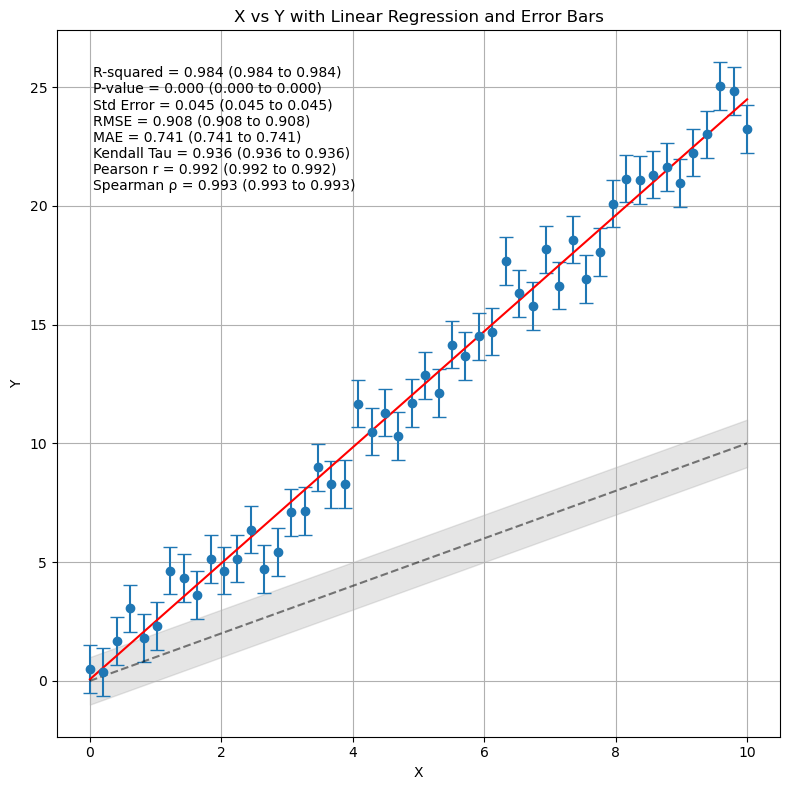

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a sample dataset
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 50)
true_y = 2.5 * x
y = true_y + np.random.normal(scale=1.0, size=x.size)  # Introducing random errors

# Define error bars (assuming known errors)
y_err = np.full_like(y, 1.0)  # Assuming constant error bars of 1 kcal

# Perform linear regression on original data
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Perform linear regression with all errors added
y_plus_err = y + y_err
slope_plus, intercept_plus, r_value_plus, p_value_plus, std_err_plus = stats.linregress(x, y_plus_err)

# Perform linear regression with all errors subtracted
y_minus_err = y - y_err
slope_minus, intercept_minus, r_value_minus, p_value_minus, std_err_minus = stats.linregress(x, y_minus_err)

# Calculate additional statistics for the original, added, and subtracted errors
def calculate_stats(y_data, line):
    rmse = np.sqrt(np.mean((y_data - line)**2))
    mae = np.mean(np.abs(y_data - line))
    kendall_tau, _ = stats.kendalltau(x, y_data)
    pearson_r, _ = stats.pearsonr(x, y_data)
    spearman_rho, _ = stats.spearmanr(x, y_data)
    return rmse, mae, kendall_tau, pearson_r, spearman_rho

# Calculate stats for original, plus error, and minus error data
rmse, mae, kendall_tau, pearson_r, spearman_rho = calculate_stats(y, line)
rmse_plus, mae_plus, kendall_tau_plus, pearson_r_plus, spearman_rho_plus = calculate_stats(y_plus_err, slope_plus * x + intercept_plus)
rmse_minus, mae_minus, kendall_tau_minus, pearson_r_minus, spearman_rho_minus = calculate_stats(y_minus_err, slope_minus * x + intercept_minus)

# Create the square plot with error bars
plt.figure(figsize=(8, 8))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Data Points with Error Bars', capsize=5)
plt.plot(x, line, 'r', label=f'Best Fit Line: y={slope:.2f}x + {intercept:.2f}')
plt.title('X vs Y with Linear Regression and Error Bars')
plt.xlabel('X')
plt.ylabel('Y')

# Plot y = x line (identity line)
plt.plot(x, x, 'k--', alpha=0.5, label='y = x (identity line)')

# Shading within 1 kcal of the y = x line
plt.fill_between(x, x-1, x+1, color='gray', alpha=0.2, label='±1 kcal Range')

# Annotate with statistics including ranges
stats_text = (f'R-squared = {r_value**2:.3f} ({r_value_minus**2:.3f} to {r_value_plus**2:.3f})\n'
              f'P-value = {p_value:.3f} ({p_value_minus:.3f} to {p_value_plus:.3f})\n'
              f'Std Error = {std_err:.3f} ({std_err_minus:.3f} to {std_err_plus:.3f})\n'
              f'RMSE = {rmse:.3f} ({rmse_minus:.3f} to {rmse_plus:.3f})\n'
              f'MAE = {mae:.3f} ({mae_minus:.3f} to {mae_plus:.3f})\n'
              f'Kendall Tau = {kendall_tau:.3f} ({kendall_tau_minus:.3f} to {kendall_tau_plus:.3f})\n'
              f'Pearson r = {pearson_r:.3f} ({pearson_r_minus:.3f} to {pearson_r_plus:.3f})\n'
              f'Spearman ρ = {spearman_rho:.3f} ({spearman_rho_minus:.3f} to {spearman_rho_plus:.3f})')

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top')

# Adding grid, legend, and other aesthetic improvements
plt.grid(True)
#plt.legend()
plt.tight_layout()

# Show the square plot with additional features
plt.show()